In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(123)


In [142]:
#b i - reading from the dataset
data = pd.read_csv('dataset.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractional
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [143]:
data['diagnosis'] = data['diagnosis'].map({'M':0,'B':1})
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractional
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [144]:
#b ii - splitting the data to train and test data
X = data.iloc[:,2:].values
Y = data.iloc[:,1].values
y_true = Y[:, np.newaxis]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_true)
print(X)


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [145]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [146]:
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape})')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (426, 30)
Shape y_train: (426, 1))
Shape X_test: (143, 30)
Shape y_test: (143, 1)


In [147]:
#b iii
#Initialising learning rate, epochs
class Perceptron(object):
    def __init__(self,learning_rate,epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        
#initialising weights, delta_w is the weight vector       
    def fit(self,X,y):
        self.weights = np.zeros(1+X.shape[1])
        self.errors = []
        for i in range(self.epochs):
            error = 0
            for xi, output in zip(X, Y):
                delta_w = self.learning_rate * (output - self.predict(xi))
                self.weights[1:] += delta_w * xi
                self.weights[0] += delta_w
                error += int(delta_w != 0.0)
            self.errors.append(error)
        return self.weights
    
    def inputs(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    #b iv - activation function
    def predict(self, X):
        return np.where(self.inputs(X) >= 0.0, 1, 0)

   


In [148]:
perceptron = Perceptron(0.08,100)
#b v-training the model
trained_weights = perceptron.fit(X_train,y_train)


In [149]:
#b vi - printing the weights and the hyper parameters
print("Learned weights \n: ",trained_weights)
print("\nLearning rate : ",perceptron.learning_rate)
print("\nEpochs : ",perceptron.epochs)

Learned weights 
:  [-1.45600000e+01 -5.26472000e+00 -2.06416000e+01  1.03072000e+01
  5.90400000e+00 -1.40628000e-01 -1.04541520e+00  1.11353960e+00
  1.10172672e+00 -3.65875200e+00 -1.10245280e+00 -1.05855760e+01
  4.95007040e+01 -1.43317680e+01 -4.21349920e+02 -7.62169600e-02
 -1.57196888e+00  1.39345384e+00  5.48811680e-01 -1.02973360e+00
 -1.41293808e-01 -3.46360800e+01  1.54771200e+02  1.14076000e+02
  2.95200000e+00 -2.18238400e-01 -6.78996080e+00  5.47313680e+00
  2.56582800e+00 -7.56397600e+00 -1.66492640e+00]

Learning rate :  0.08

Epochs :  100


In [150]:
#b vii - predicting the outputs of train and test data
y_predicted_train = perceptron.predict(X_train)
y_predicted_test = perceptron.predict(X_test)

print(y_predicted_train)
print("Training accuracy: ",100 - np.mean(np.abs(y_predicted_train - y_train)) * 100," %")
print("Testing accuracy: ",100 - np.mean(np.abs(y_predicted_test - y_test)) * 100," %")


[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Training accuracy:  58.97088320218651  %
Testing accuracy:  59.49924201672454  %


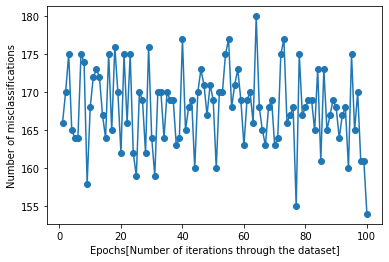

In [175]:
#Visualisation
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Epochs[Number of iterations through the dataset]')
plt.ylabel('Number of misclassifications')
plt.show()

In [176]:
def performance_measure(y_test, y_predicted_test):
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0

    for i in range(len(y_predicted_test)): 
        if y_test[i]==y_predicted_test[i]==1:
            true_positives += 1
        if y_predicted_test[i]==1 and y_test[i]!=y_predicted_test[i]:
            false_positives+= 1
        if y_test[i]==y_predicted_test[i]==0:
            true_negatives += 1
        if y_predicted_test[i]==0 and y_test[i]!=y_predicted_test[i]:
            false_negatives += 1
           
    
    return(true_positives, false_negatives, false_positives,true_negatives)

print(np.reshape(np.array(['True positives','False negatives','False positives','True negatives']),(-1,2)))
print ("\n\n",np.reshape(np.array(perf_measure(y_test,y_predicted_test)),(-1,2)))


[['True positives' 'False negatives']
 ['False positives' 'True negatives']]


 [[89 38]
 [16  0]]
